In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.special import expit

from plotka import plot_decision_regions

In [2]:
class LogisticRegressionGD(object):
    def __init__(self, learningRate=0.05, epochs=100, random_state=1):
        self.lr = learningRate
        self.epochs = epochs
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.weights = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.bias = rgen.normal(loc=0.0, scale=0.01)
        self.costs = []

        for i in range(self.epochs):
            net_input = self.net_input(X)
            
            output = expit(net_input)
            
            errors = (y - output)
            
            self.weights += self.lr * X.T.dot(errors)
            self.bias += self.lr * errors.sum()
            
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            
            self.costs.append(cost)
        
        return self

    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [3]:
class Multiclass(object):
    
    def __init__(self, reg1, reg2):
        self.reg1 = reg1
        self.reg2 = reg2

    def predict(self, X):
        result = []
        
        for data in X:
            if self.reg1.predict(data) == 1:
                result.append(0)
            elif self.reg2.predict(data) == 1:
                result.append(1)
            else:
                result.append(2)

        return np.array(result)

In [4]:
def main():
    
    r8 = float(input('Learning rate: '))
    epochs = int(input('Epochs: '))
    
    iris = datasets.load_iris()
    
    X = iris.data[:, [1, 3]]
    y = iris.target
    
    y1 = y.copy()
    y2 = y.copy()
    y3 = y.copy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

    y1[(y1 != 0)] = -3
    y1[y1 == 0] = 1
    y1[y1 == -3] = 0

    y3[(y3 != 2)] = -3
    y3[y3 == 2] = 1
    y3[y3 == -3] = 0

    reg1 = LogisticRegressionGD(r8, epochs, 1)
    reg1.fit(X, y1)

    reg3 = LogisticRegressionGD(r8, epochs, 1)
    reg3.fit(X, y3)


    multi = Multiclass(reg1, reg3)
    print(multi.predict(X_test))

    print(reg1.predict(X_test))

    plot_decision_regions(X=X_test, y=y_test, classifier=multi)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()

Learning rate: .01
Epochs: 1000
[1 0 2 0 0 0 1 1 1 2 0 2 1 2 1 0 1 2 2 1 2 2 0 0 1 1 0 0 2 2]
[0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


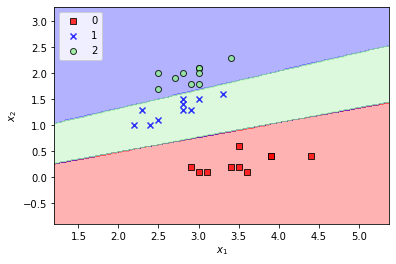

In [5]:
if __name__ == '__main__':
    main()